In [45]:
#Basic Python and Machine learning libraries
import os, sys, warnings, random, time, re, math, string, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from collections import Counter,defaultdict
from re import search
from scipy import stats

from wordcloud import WordCloud, STOPWORDS

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# sklearn data science models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.svm import LinearSVC
import xgboost as xgb

from bs4 import BeautifulSoup

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize.casual import casual_tokenize
from nltk.util import ngrams

import spacy

warnings.filterwarnings('ignore')

#tqdm with pandas
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
fname = '/content/drive/MyDrive/intern-unsw/assets/108upanishads.txt'
with open(fname, 'r', encoding='utf-8-sig') as f:
  data = f.read()
  f.close()
#################################
data = data.replace('\x0c', '')
data = data.replace('*', '')
data = data.replace("?", ".")
#data = data.replace("!", ".")
data = "".join([character if (character.isalnum() or character == "." or character ==" " or character == "\n") else " " for character in data])
data = re.sub(r'  ', " ", data)
data = data.replace(". .", ".")



In [83]:
data_list = data.split('\n')
print(len(data_list))

36392


In [ ]:
data_list

In [49]:
all_upnishdas = []
all_upnishdas_ = [x for x in data_list[16:128]]

for i, name in enumerate(all_upnishdas_):
  if len(name) > 0 and 'Followed by' not in name:
    name = name.strip().split(' ')[1] 
    all_upnishdas.append(name)
len(all_upnishdas)

108

In [96]:
data_list_valid = data_list[131:34113]
data_list_valid[-1]

'Let there be Peace in the forces that act on me '

In [ ]:
data_list_cleaned = []
for i, sentence in enumerate(data_list_valid):
  #cleaned_str = re.sub(r'^\d*\.\d*', '', sentence)
  cleaned_str = re.sub(r'^\d*(\.| )', '', sentence)
  if len(cleaned_str) > 0:
    data_list_cleaned.append(cleaned_str)
data_list_cleaned

In [ ]:
data_list_reduced = []
temp_list = []
for i, sentence in enumerate(data_list_valid):
  #cleaned_str = re.sub(r'^\d*\.\d*', '', sentence)
  if not sentence.endswith('.') or len(temp_list) == 0:
    temp_list.append(sentence)
  else:
    new_sent = ' '.join(temp_list)
    temp_list = []
    data_list_reduced.append(new_sent)
data_list_reduced

# Topic modelling using Top2vec

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]

In [106]:
from top2vec import Top2Vec

In [108]:
model = Top2Vec(documents= data_list_reduced, speed='learn', workers=8, min_count = 2, embedding_model='universal-sentence-encoder')

2021-06-01 17:42:31,094 - top2vec - INFO - Pre-processing documents for training
2021-06-01 17:42:32,388 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-06-01 17:42:49,264 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-06-01 17:42:57,109 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-06-01 17:43:43,953 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-06-01 17:43:44,347 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [109]:
model.get_num_topics()

14

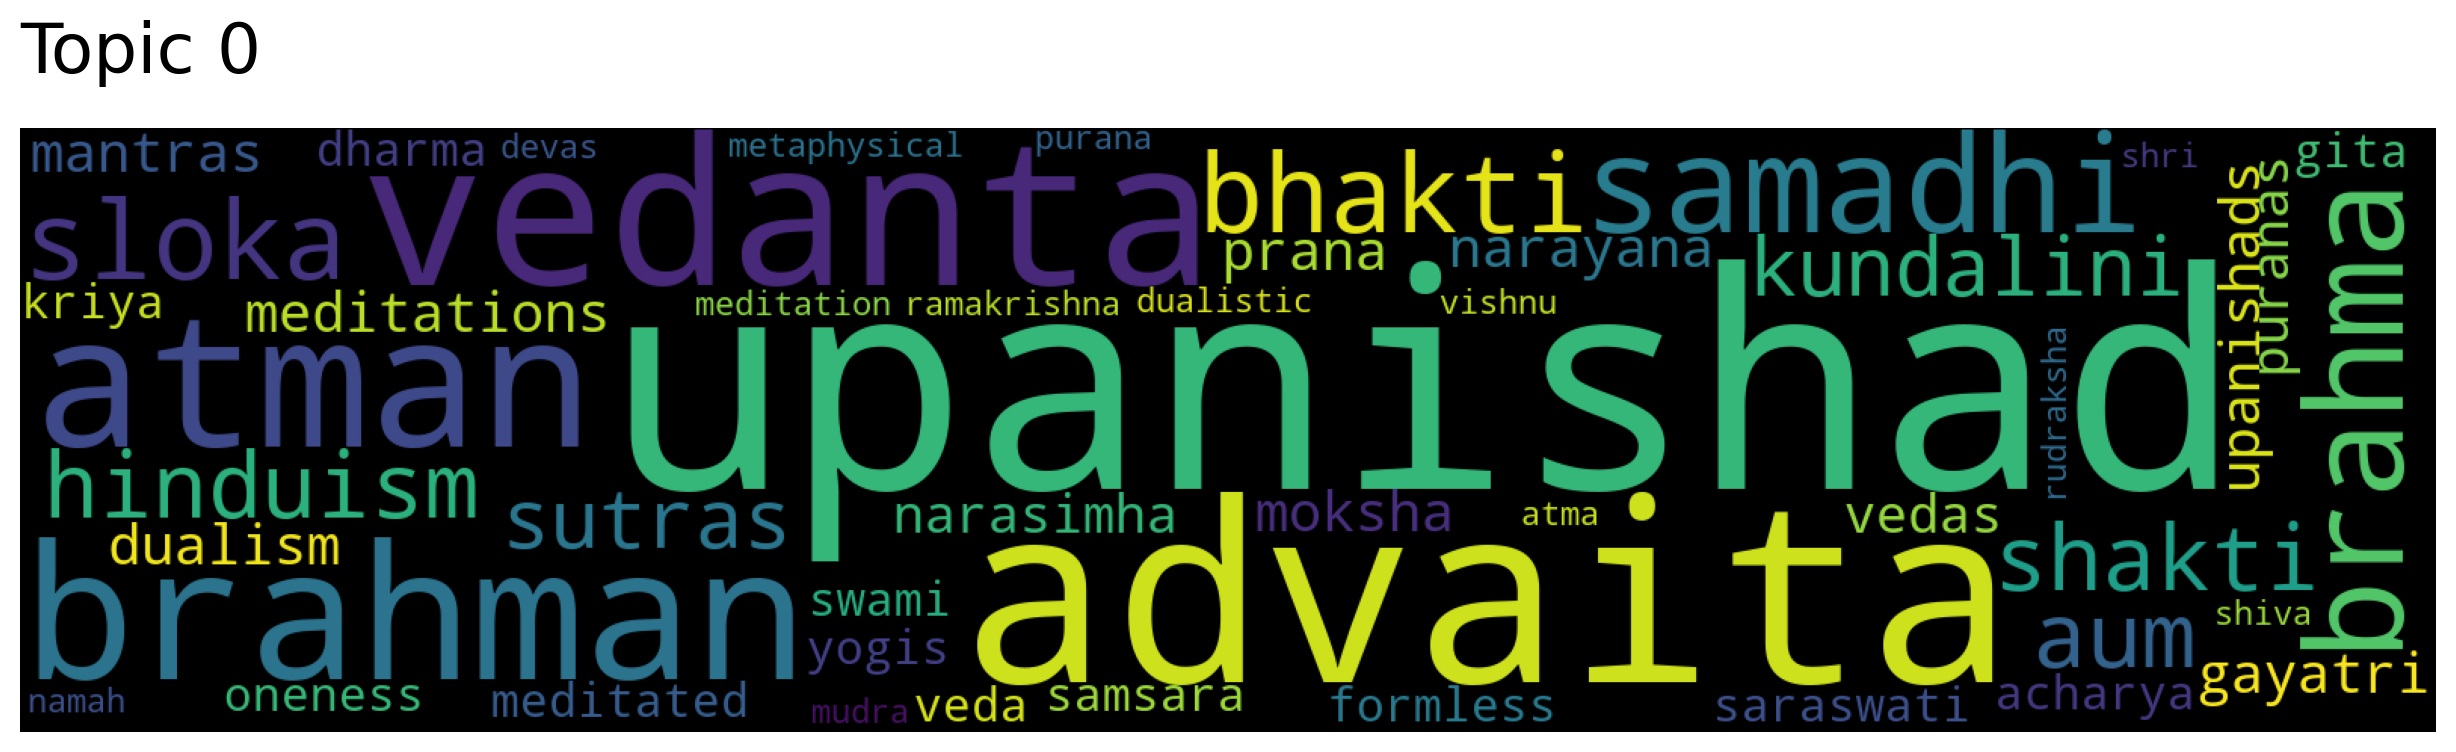

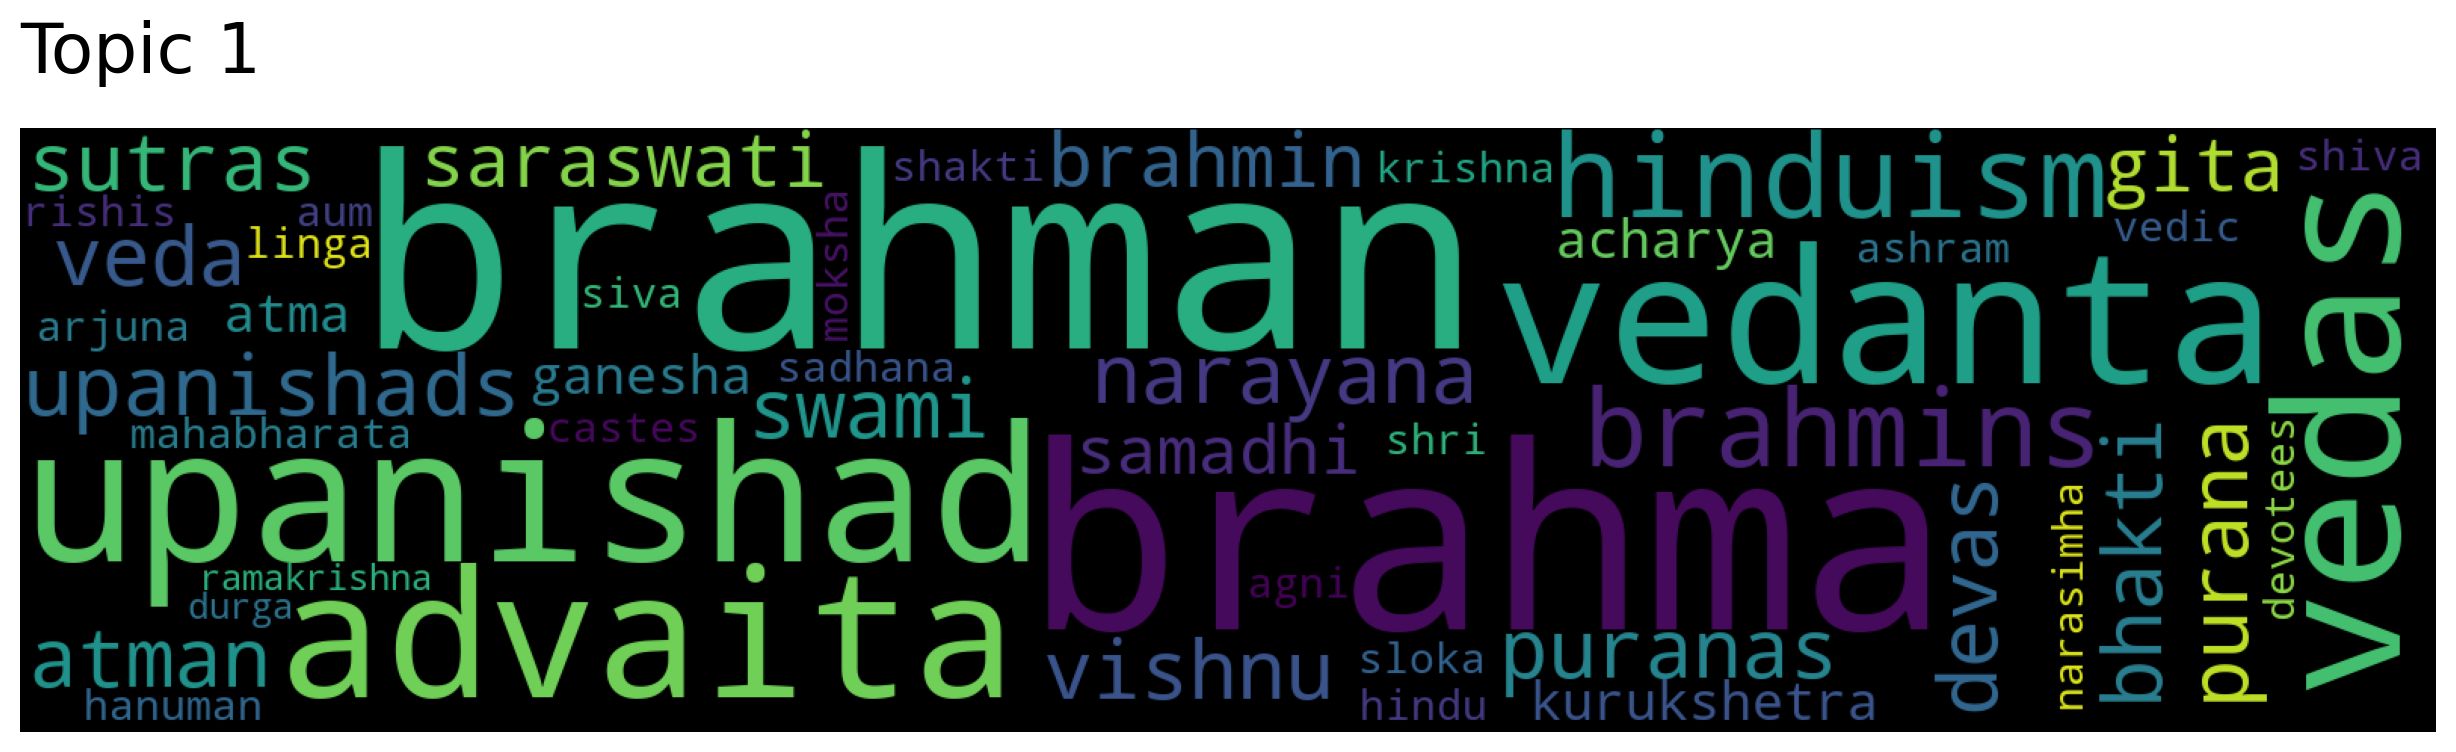

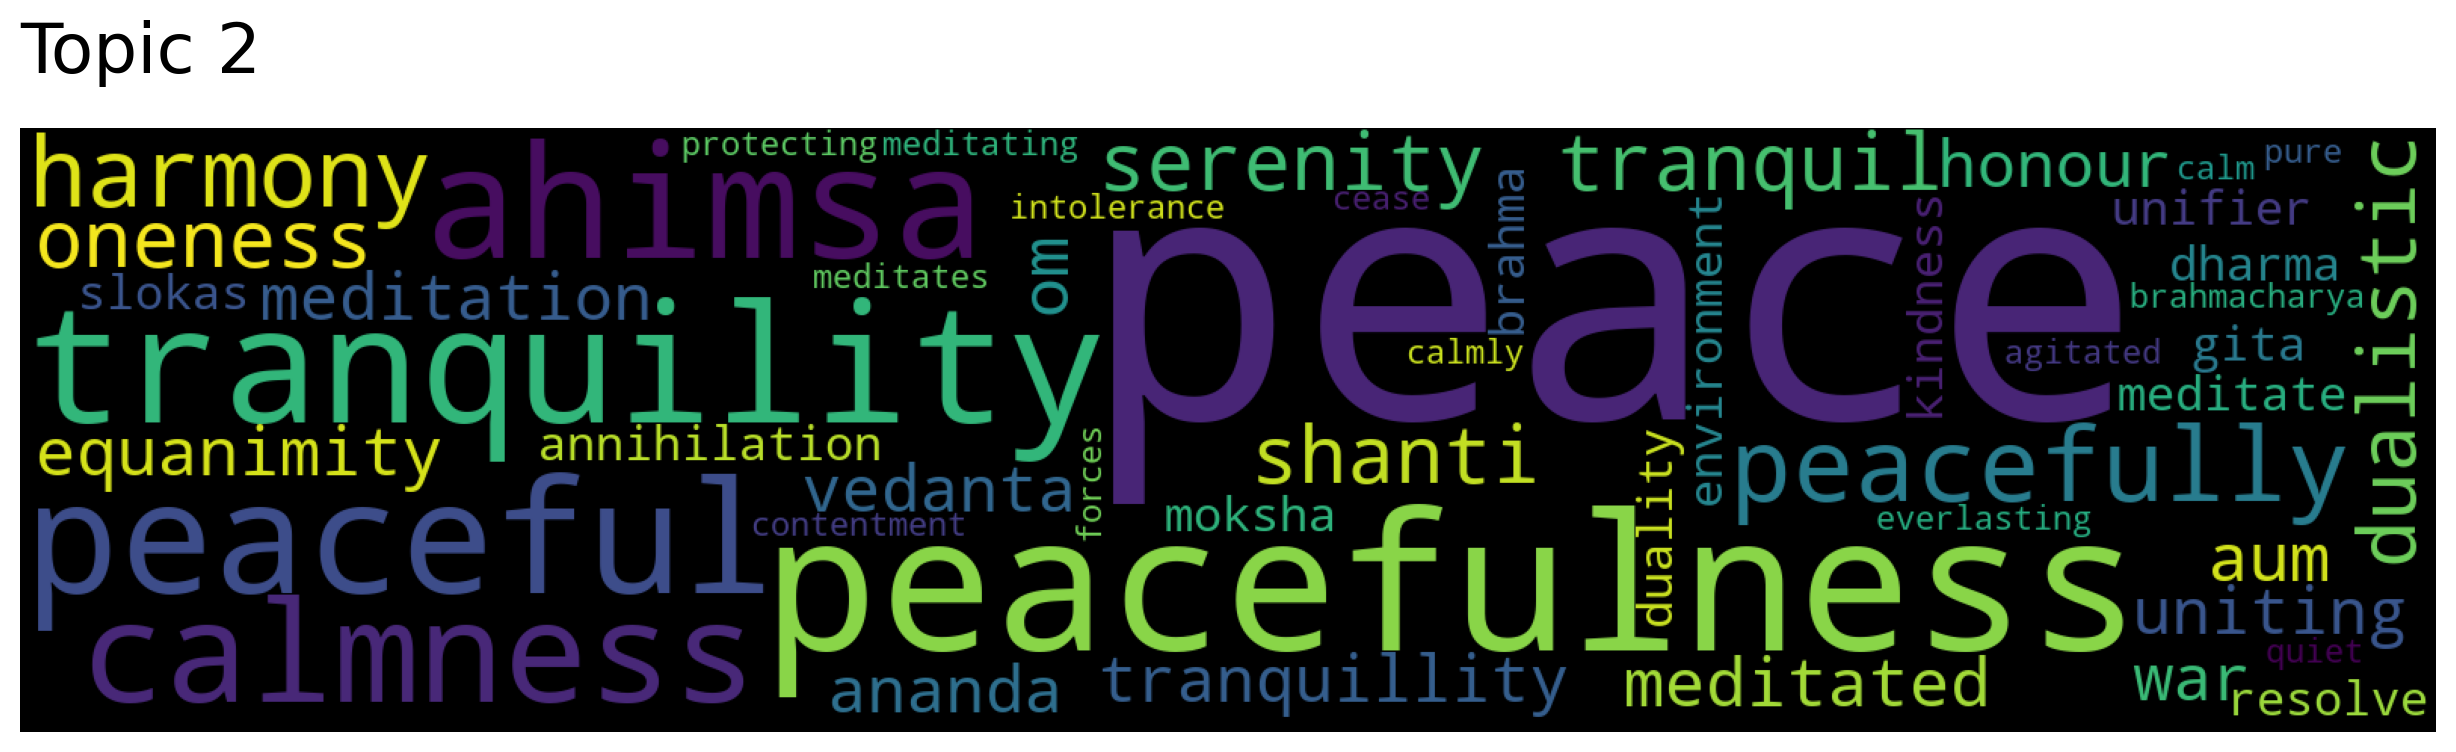

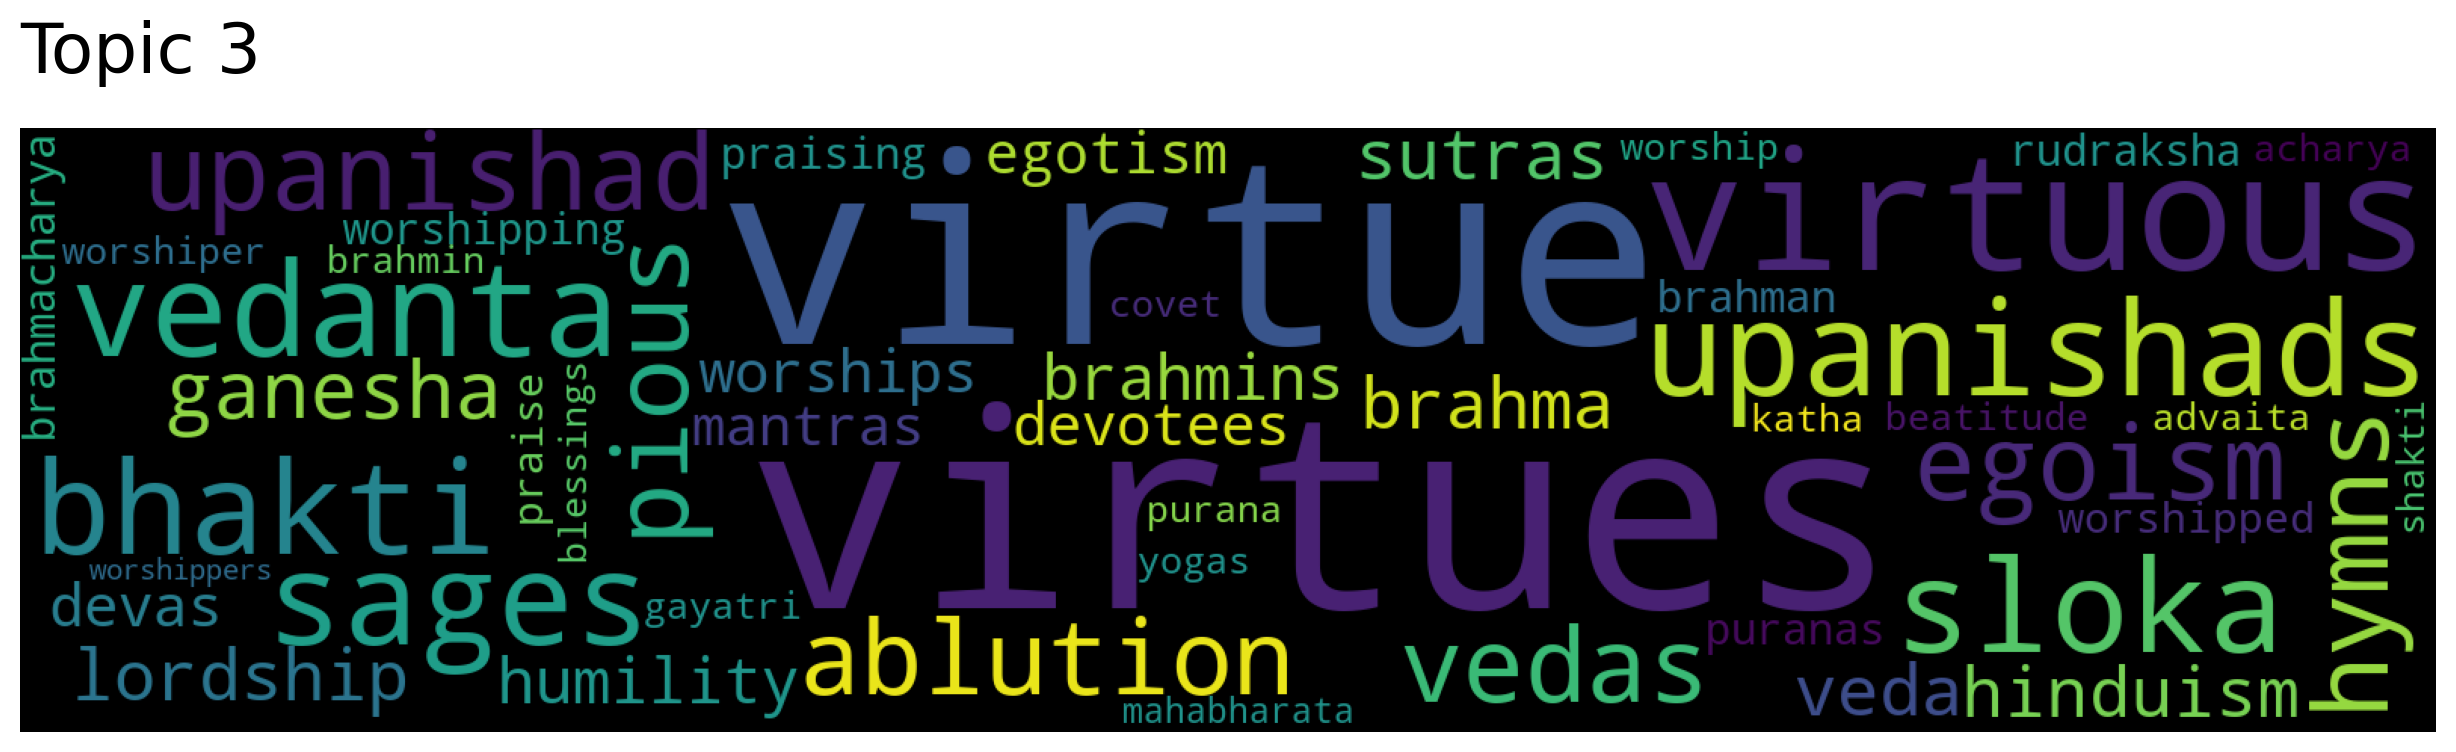

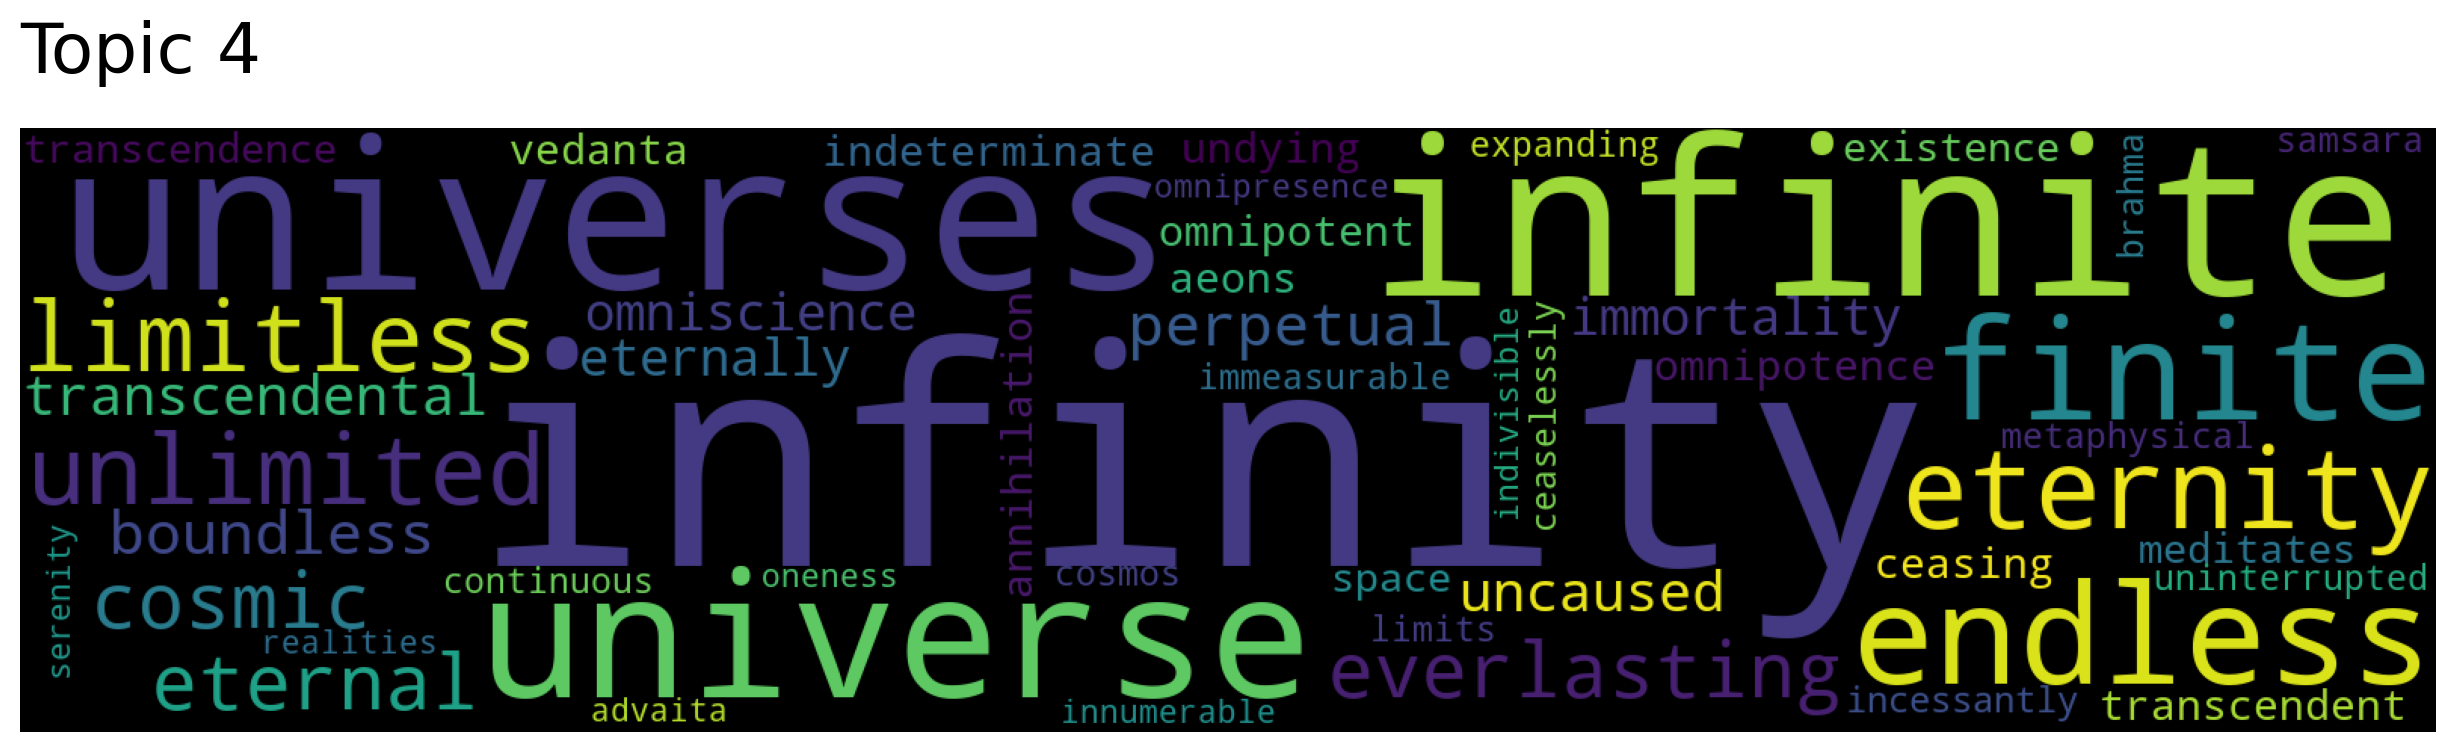

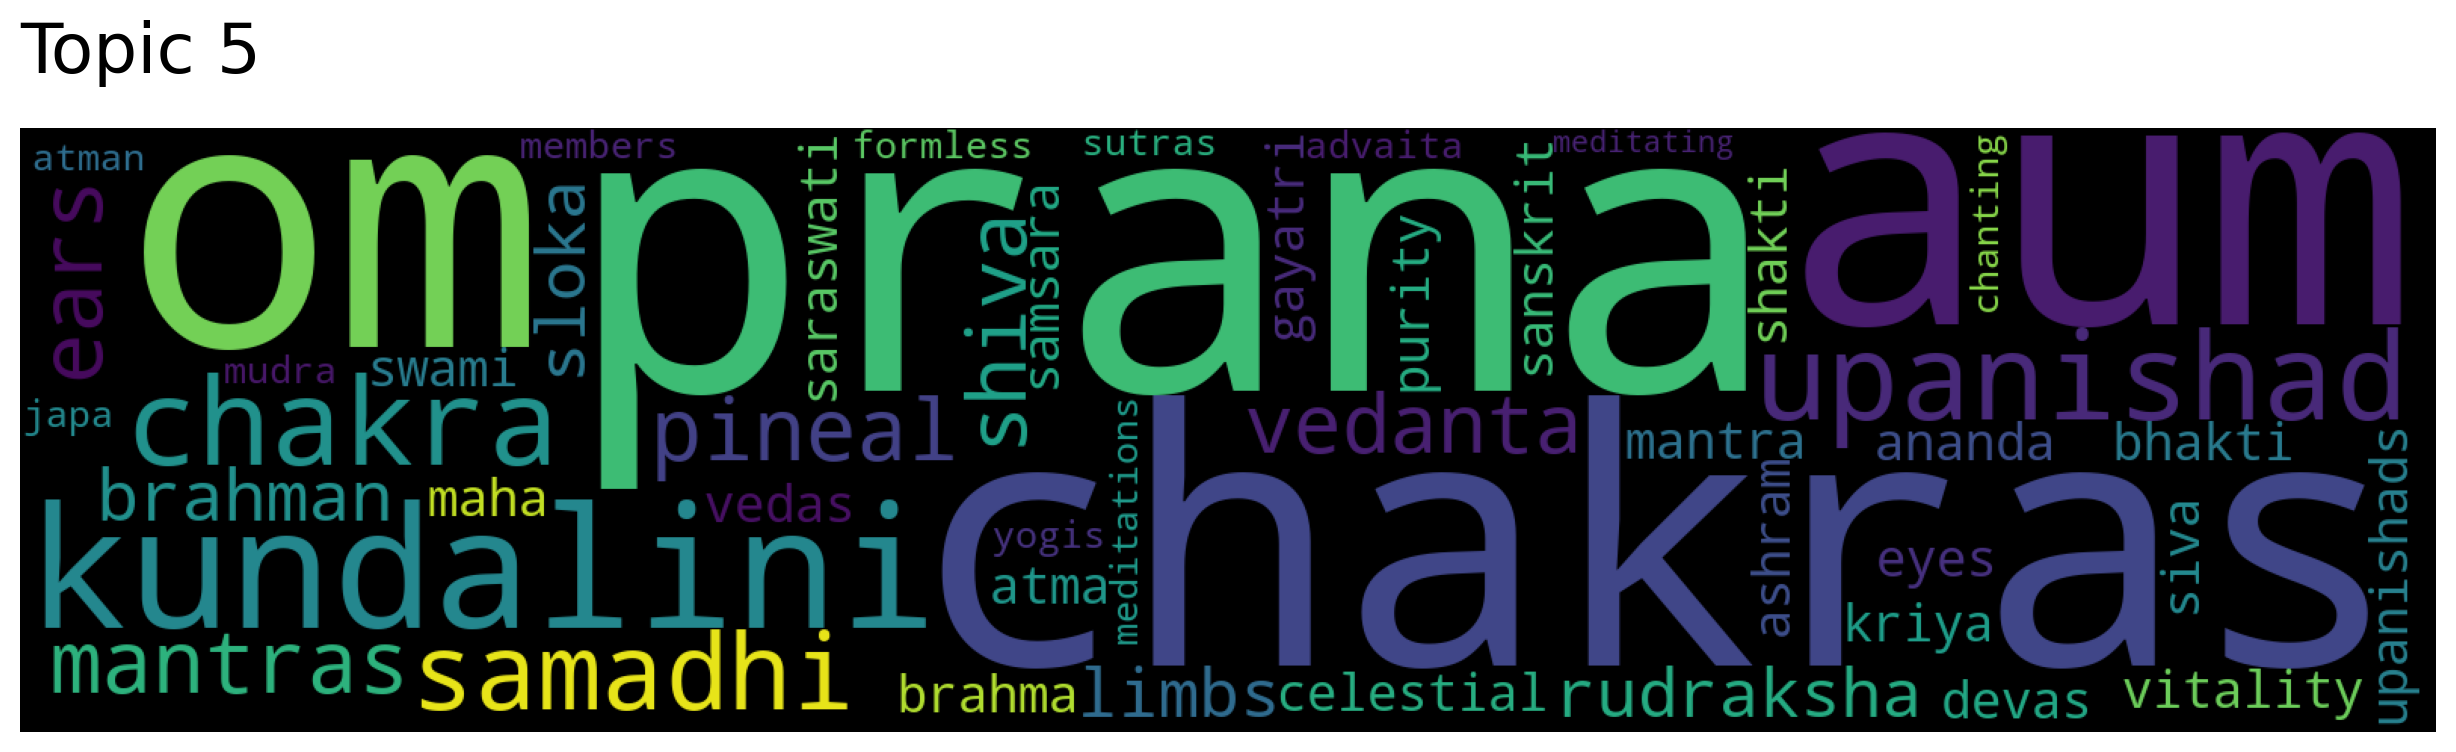

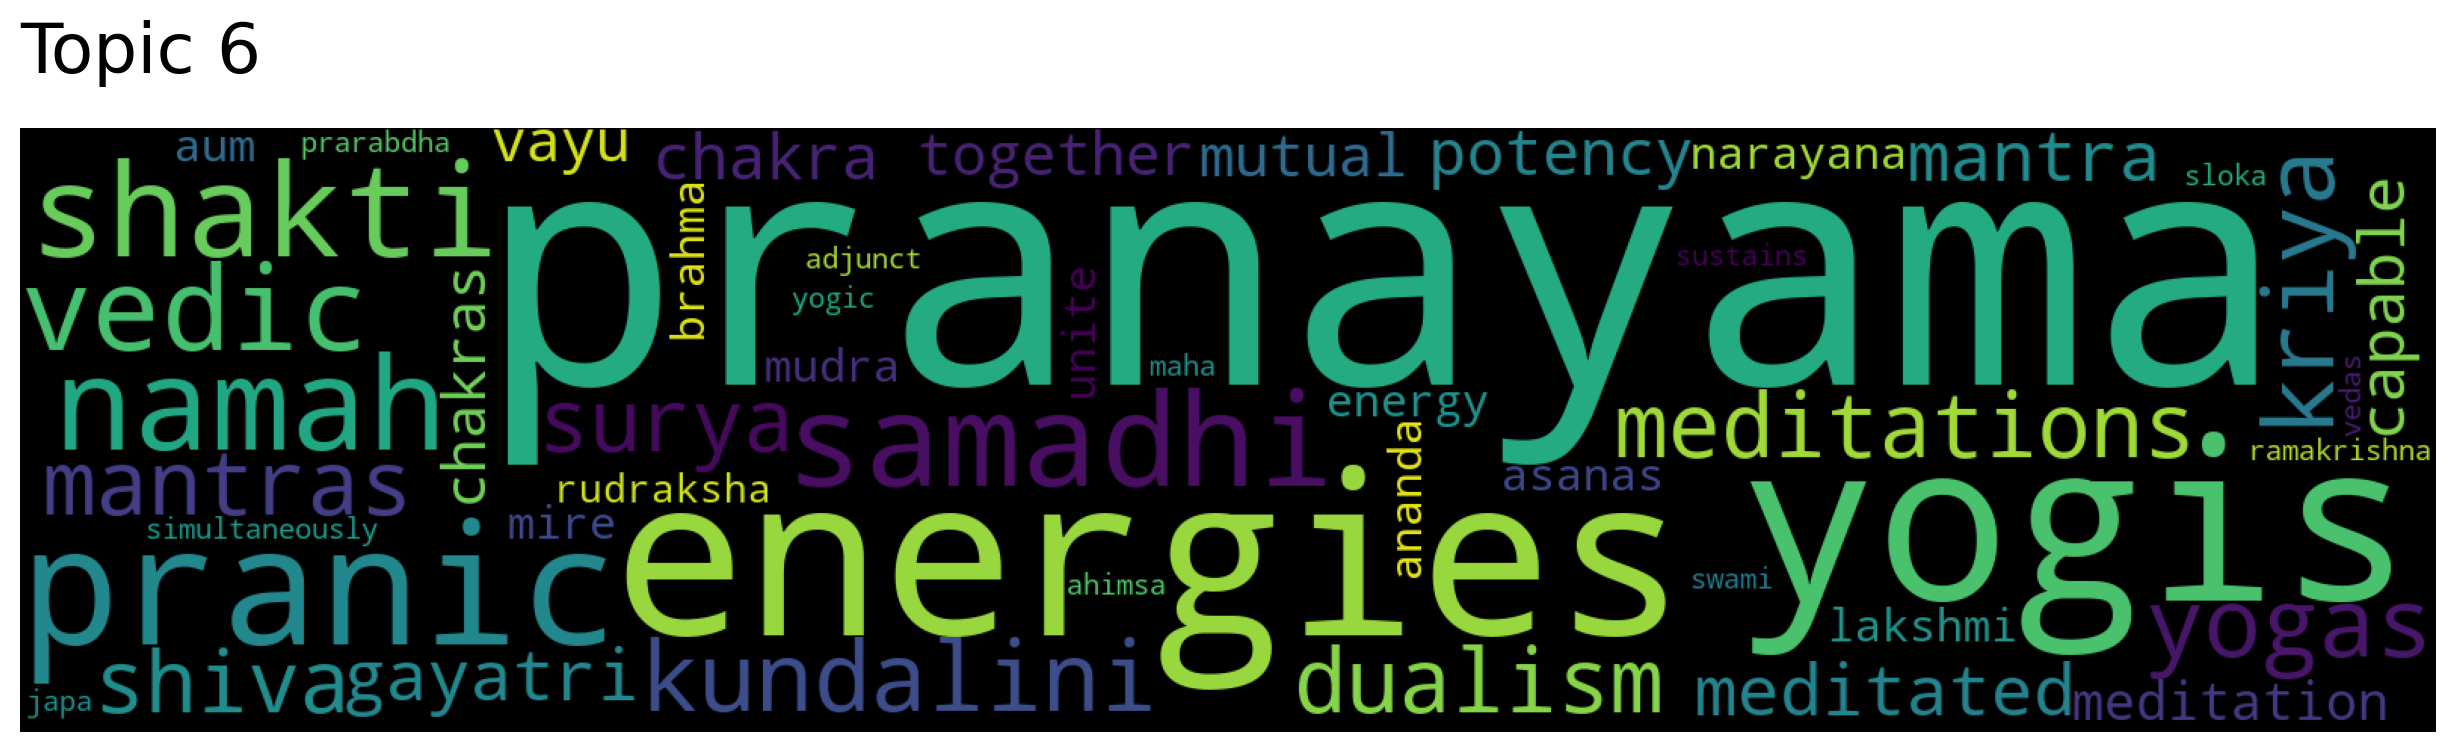

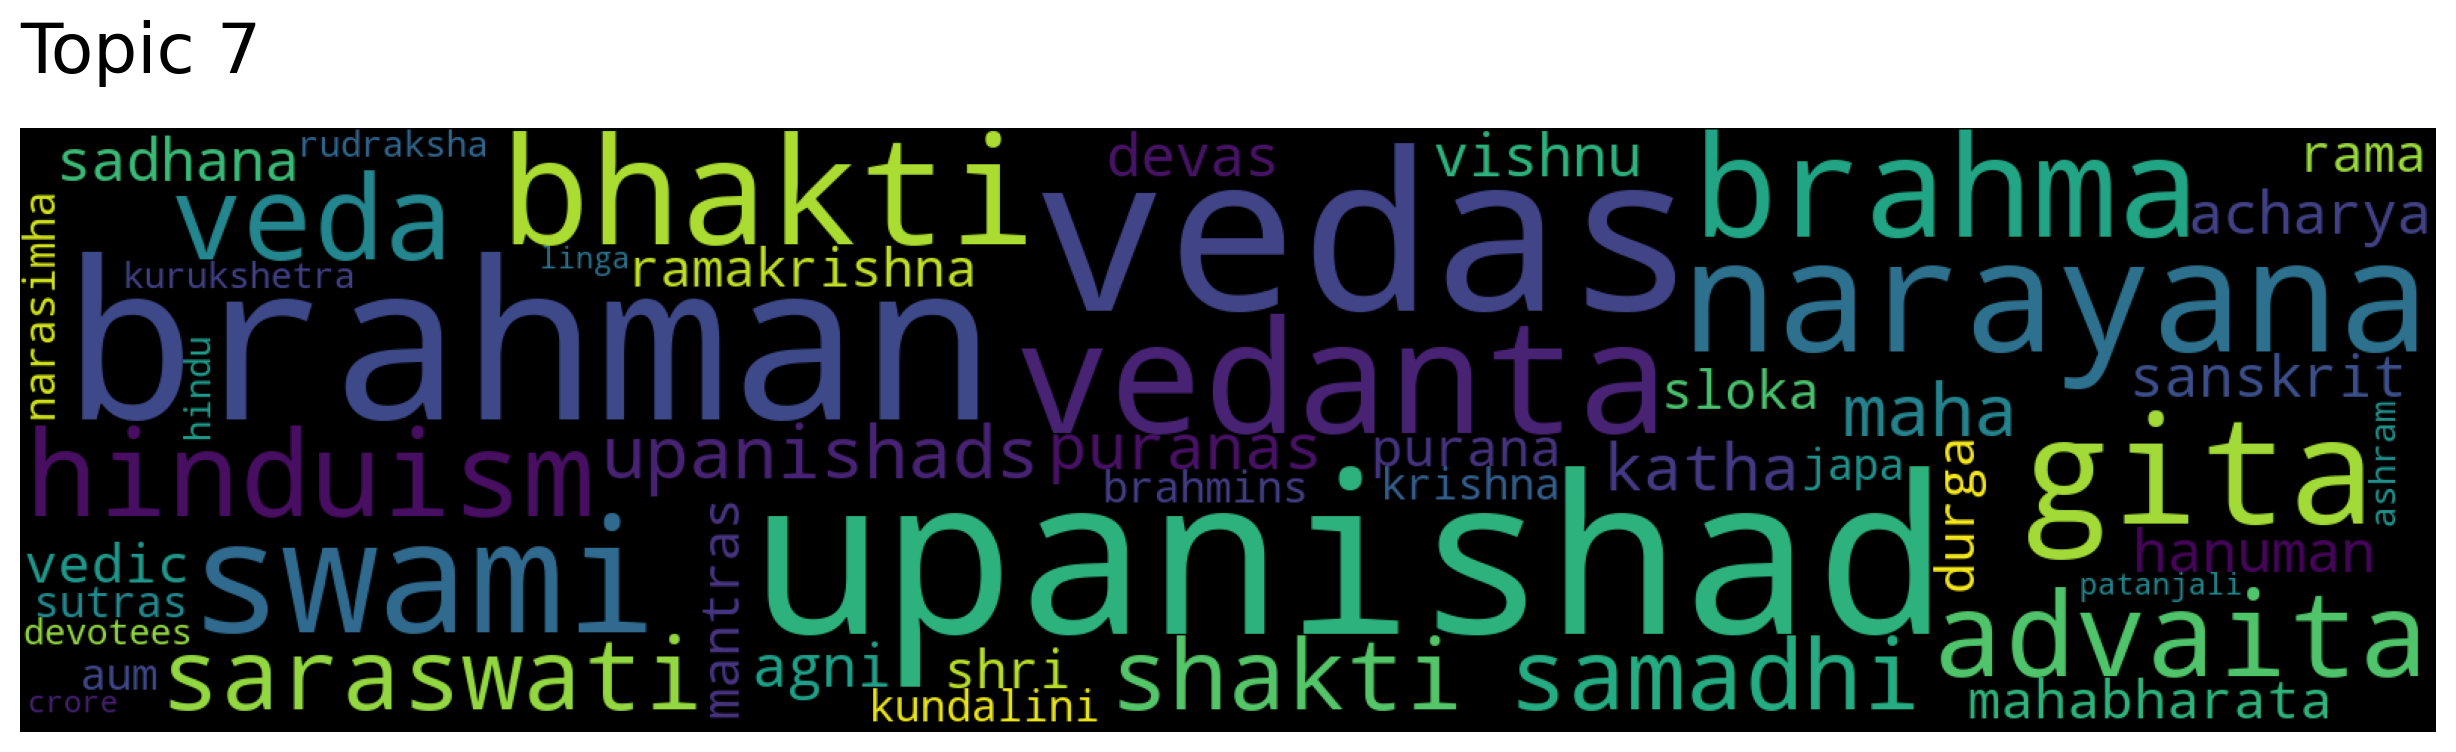

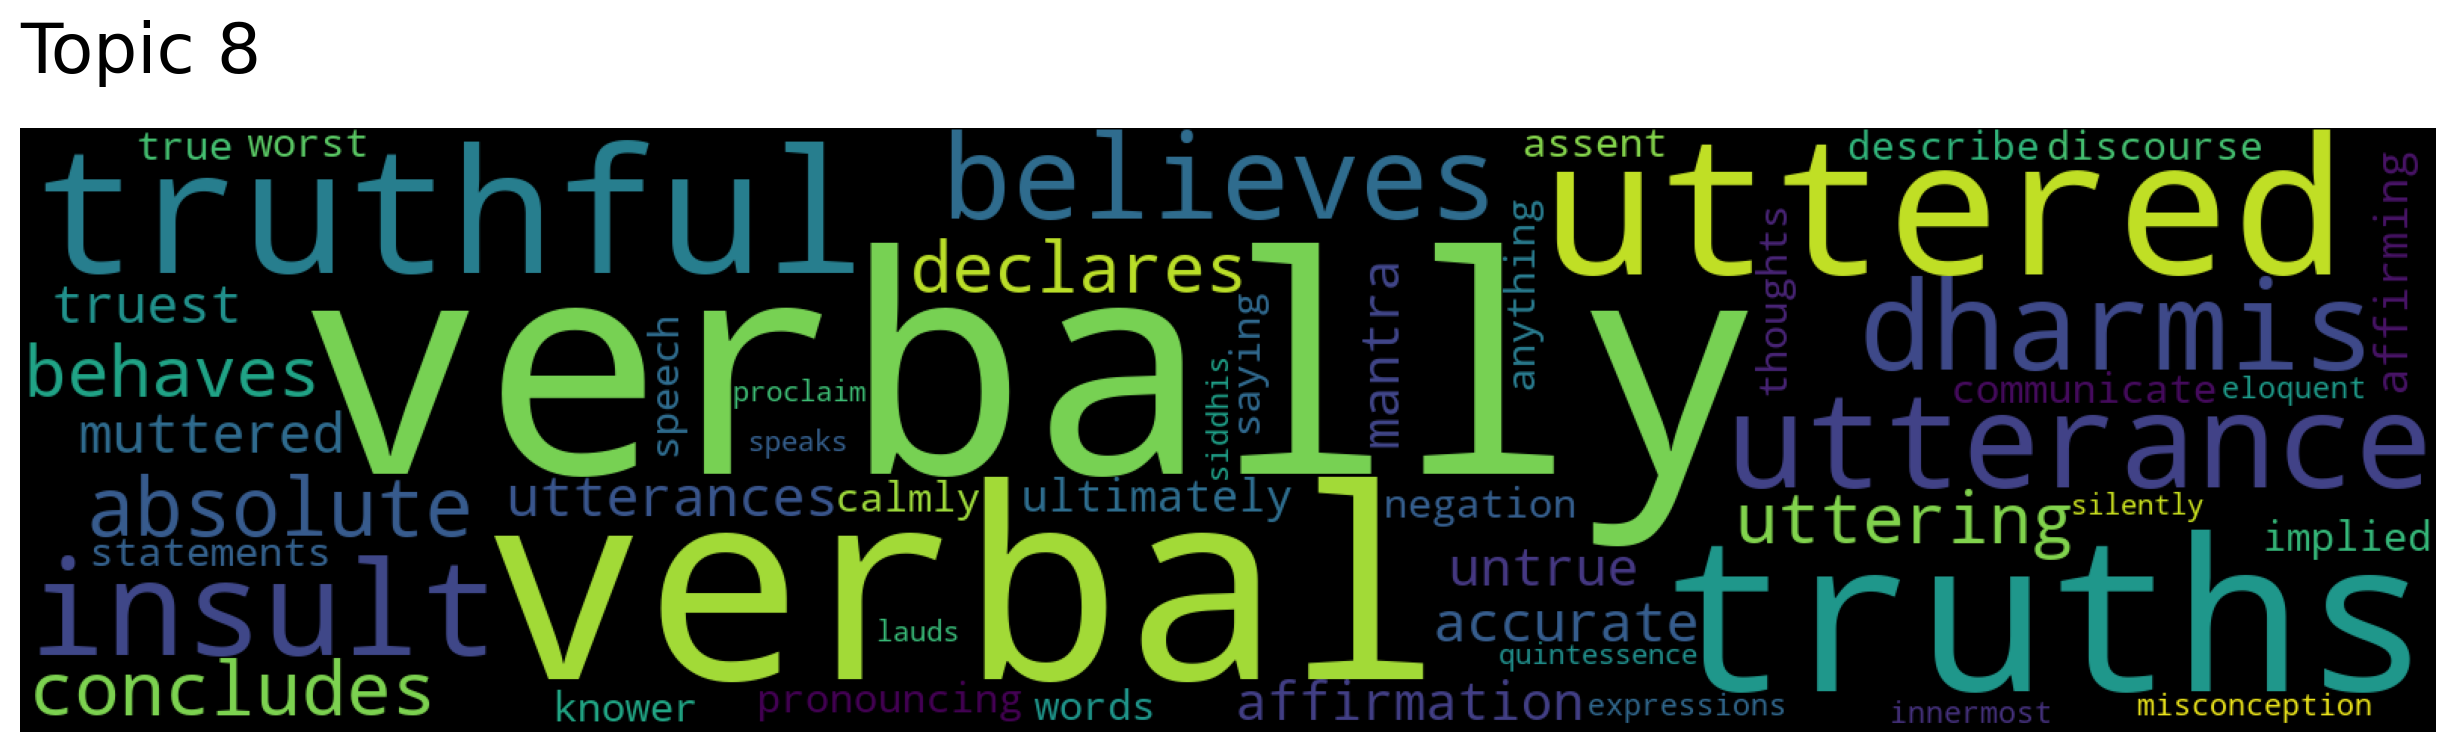

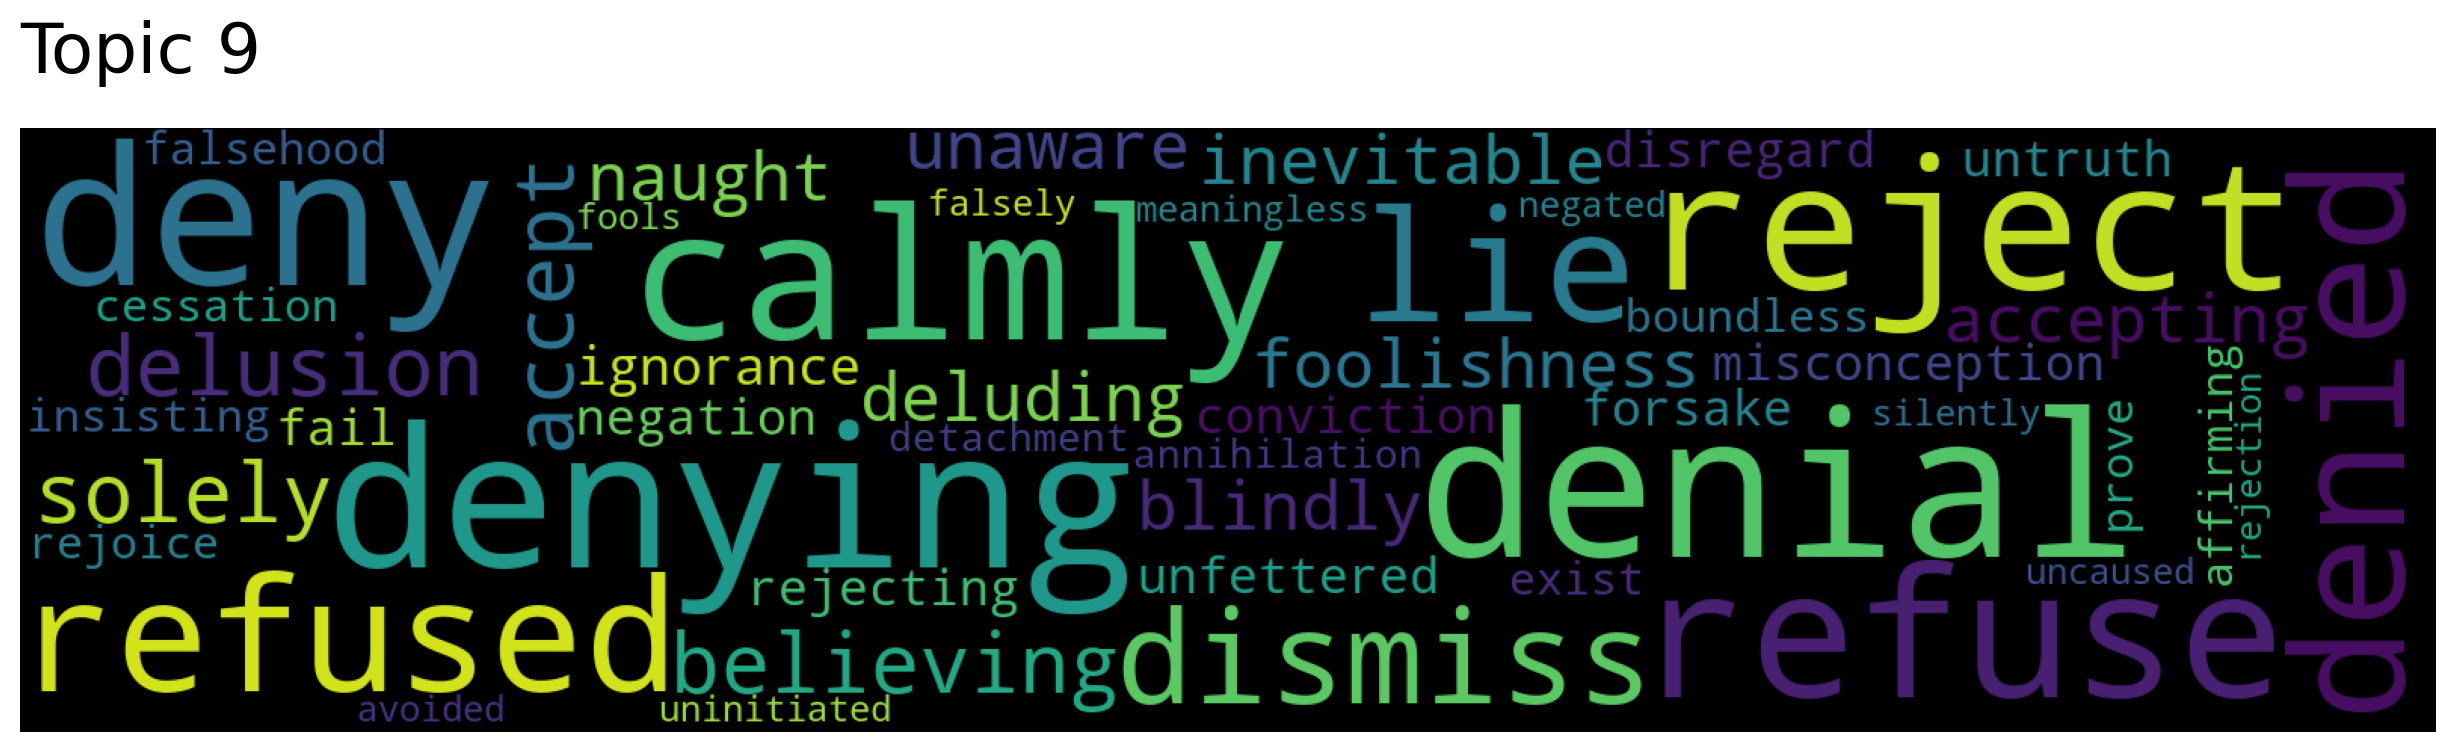

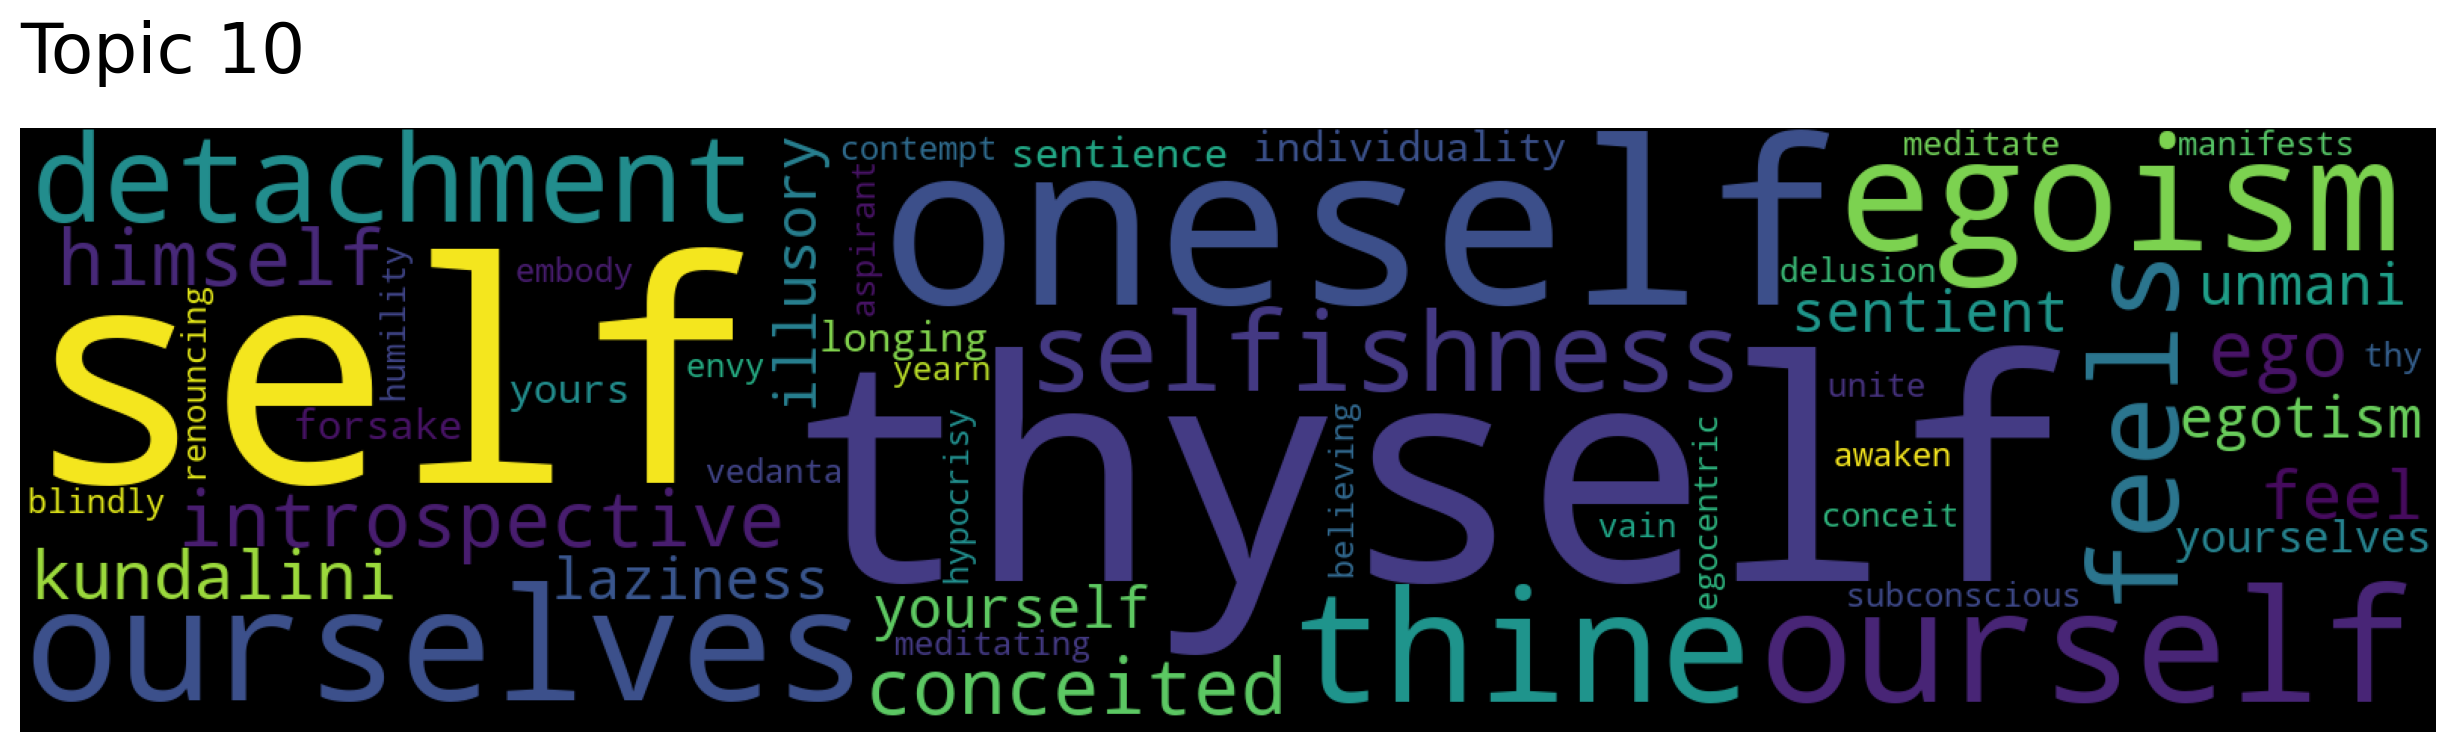

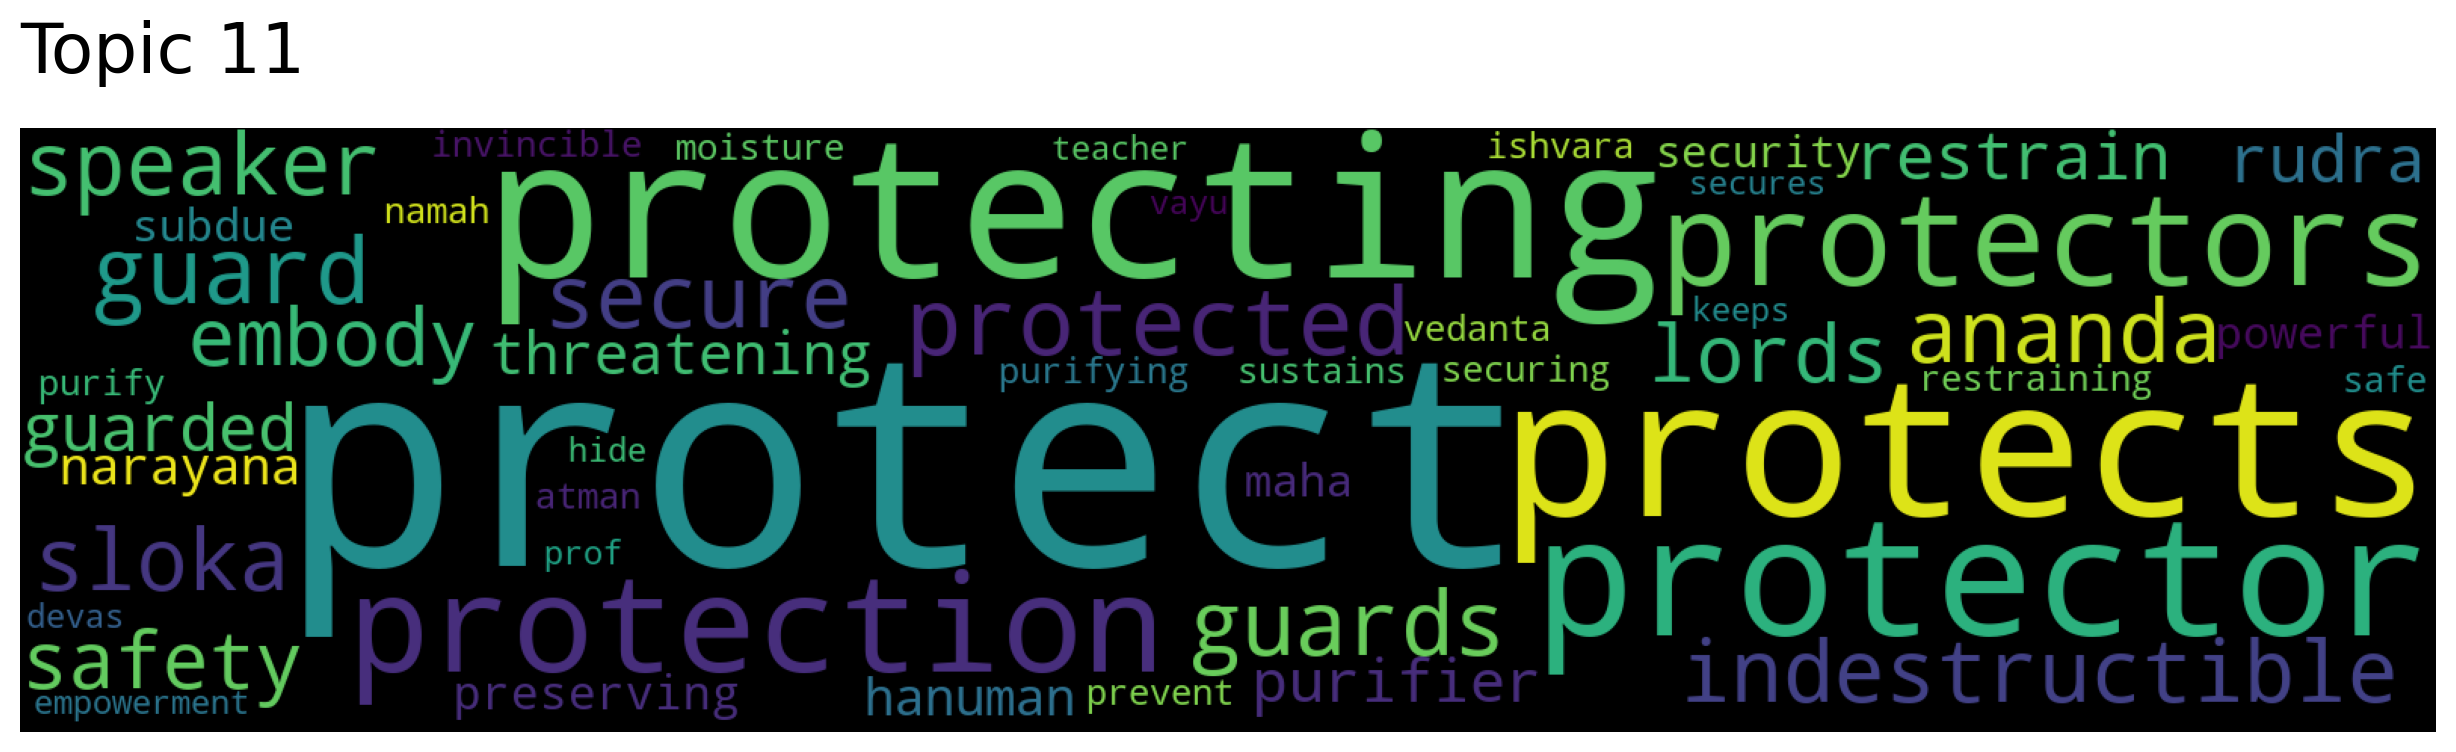

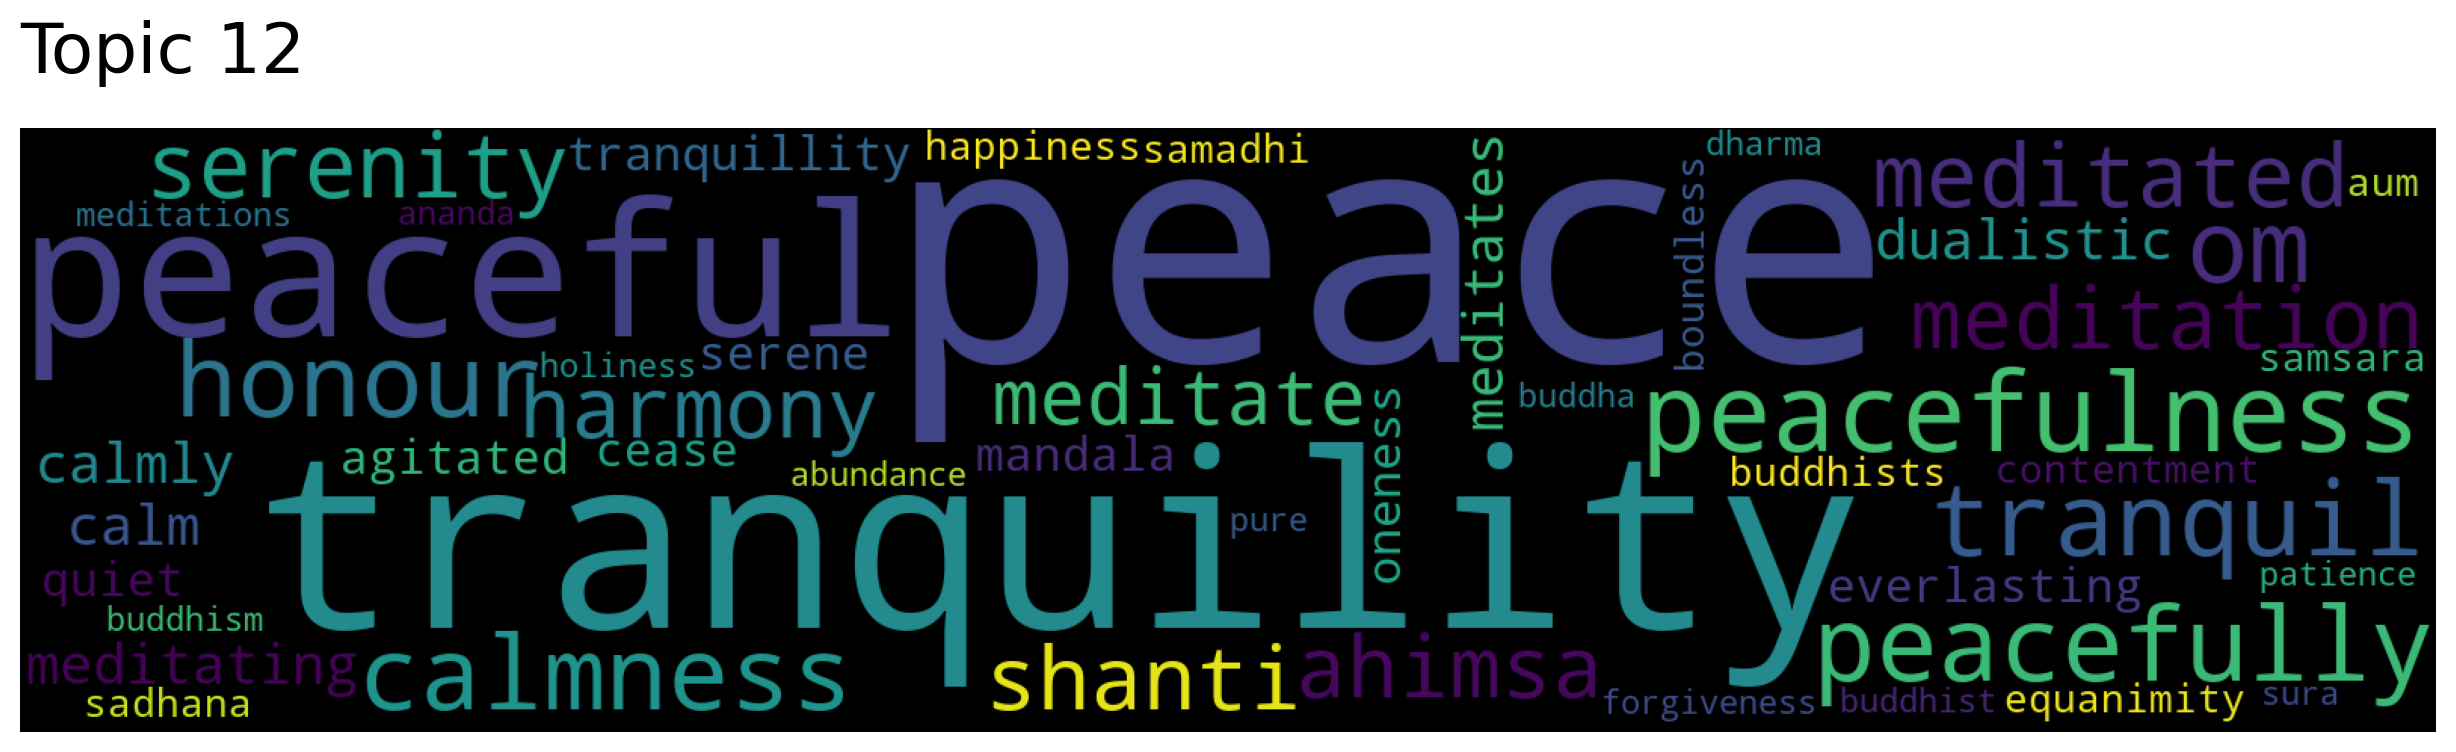

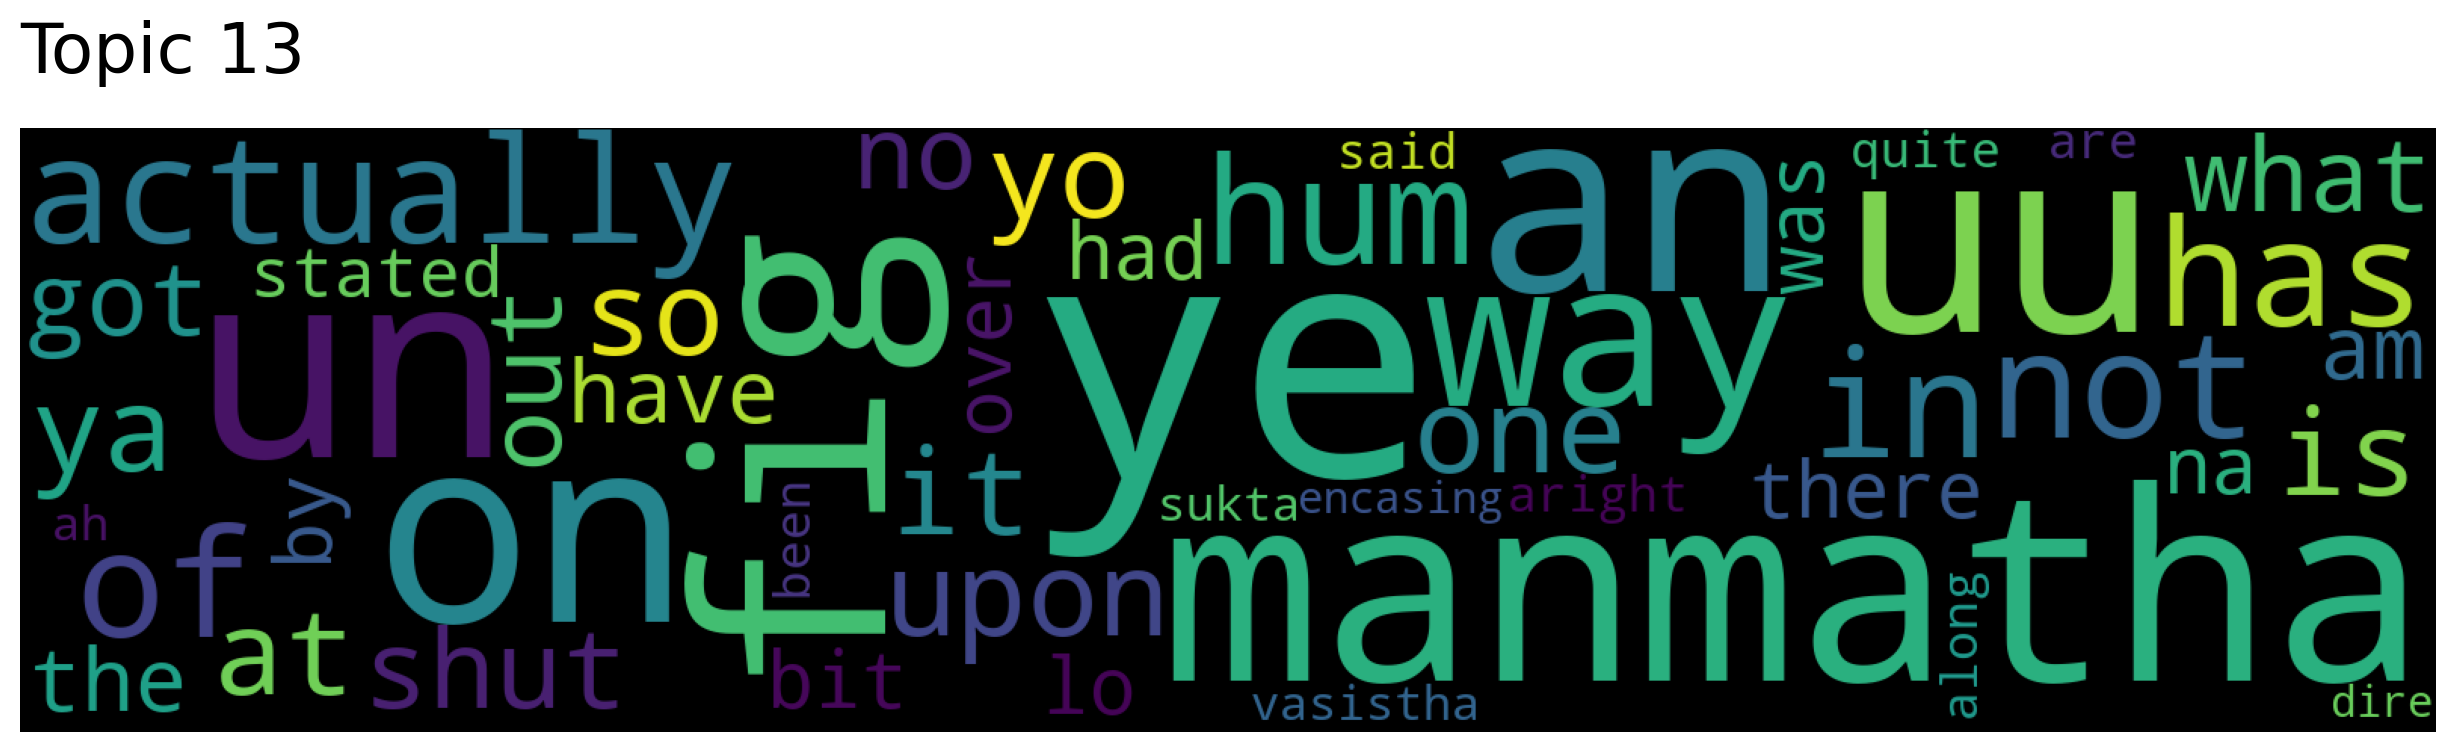

In [111]:
topic_words, word_scores, topic_nums = model.get_topics(14)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [112]:
topic_words

array([['upanishad', 'advaita', 'vedanta', 'brahman', 'atman', 'samadhi',
        'brahma', 'bhakti', 'sloka', 'hinduism', 'shakti', 'aum',
        'kundalini', 'sutras', 'narayana', 'dualism', 'gayatri',
        'mantras', 'prana', 'meditations', 'upanishads', 'moksha',
        'narasimha', 'vedas', 'puranas', 'acharya', 'oneness', 'veda',
        'meditated', 'saraswati', 'samsara', 'swami', 'yogis',
        'formless', 'gita', 'kriya', 'dharma', 'metaphysical',
        'ramakrishna', 'atma', 'purana', 'rudraksha', 'vishnu', 'shri',
        'devas', 'mudra', 'namah', 'shiva', 'meditation', 'dualistic'],
       ['brahman', 'brahma', 'upanishad', 'vedanta', 'advaita', 'vedas',
        'hinduism', 'brahmins', 'upanishads', 'bhakti', 'puranas',
        'narayana', 'veda', 'swami', 'vishnu', 'atman', 'purana',
        'devas', 'sutras', 'saraswati', 'gita', 'brahmin', 'samadhi',
        'acharya', 'atma', 'kurukshetra', 'ganesha', 'mahabharata',
        'shakti', 'moksha', 'shri', 'arjuna